# CLIP (Contrastive LAnguage-Image Pre-training)

기존 비전 모델의 가장 큰 한계는 label, 즉 레이블링 된 데이터의 수가 적다는 것이었다. 자연어 모델의 경우 인터넷에 존재하는 수많은 데이터들을 이용하여 단어간의 종속성이나 관계성을 학습시키면 되기 때문에 별도의 레이블링 작업 없이 raw-data를 수집하여 레이블링된 데이터 없이 비지도학습과 zero-shot으로도 뛰어난 성능을 보인다. 그러나 비전 모델의 경우 이미지 하나하나에 레이블링이 필요하고 이를 수동으로 작업해야되기 때문에 대량의 이미지 라벨링 데이터셋을 확보한다는 것은 어렵다. 

## NLP Supervision

자연어를 Supervision으로 사용하는 방법을 택했는데, 이는 모델에게 이미지와 인터넷상에서 이미지를 설명하는 raw한 자연어 문장을 그대로 사용해서 모델에게 이미지를 설명해주는 방식이다. 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbjHXPy%2FbtsI3bpL3oj%2FAAAAAAAAAAAAAAAAAAAAAAUf2UyJZ-sR1gG3GwRbXEd7B4rkV76-irSH51rReeOZ%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3Dez9wvELKN%252FlTqCOo%252BMJn8FTHbMo%253D">

상황을 설명하는 자연어 문장 자체를 그대로 label로 사용하여 입력으로 사용된다. 이를 통해 인터넷에 있는 많은 데이터를 쉽게 수집하고 대량의 데이터셋을 구축할 수 있다. 

## Contrastive Learning

<img scr="https://inforience.net/wp-content/uploads/2021/02/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2021-02-09-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.53.52.png">

CLIP 모델은 이미지와 텍스트를 같이 학습시켜야되므로, CrossEntropy로 Loss 계산이 불가능하다. 따라서 Contrastive Learning 방식을 통해 연관 있는 데이터 특징들은 Feature Space 상에 가깝게 위치시키고 관련이 없는 데이터끼리는 거리를 멀어지도록 embedding newtwork를 학습한다. 따라서 CLIP 에서는 이미지를 처리하는 인코더와 텍스트를 처리하는 인코더를 각각 둔다. 이미지 인코더는 ResNet이나 ViT를 사용하고, 텍스트 인코더는 Transformer 아키텍처를 사용한다. 각각의 인코더는 마지막 출력에서 고정된 크기의 임베딩 벡터를 생성하고 이미지와 텍스트 간 코사인 유사도를 계산하여 연관성을 계산한다. 

## Zero Shot Prediction

<img scr="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FqDIn2%2FbtsI2fnbMHK%2FAAAAAAAAAAAAAAAAAAAAAPqD8IWI9AlQ49LtSX1Ae1dsxD35_sXQdJ1pBo99qZMX%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DMxcfsn7uD26Un00wy8a7y%252FDXgDs%253D">

CLIP의 이미지-텍스트 페어 학습 방법을 이용하면 다양한 시도가 가능한데, 그 중 하나가 Zero Shot Prediction이다. Zero Shot 즉, 한번도 보지 않은 이미지에 대해 예측하는 테스크를 말한다. 이러한 방식은 기존의 이미지 분류를 위한 Supervised Learning 방식에서는 불가한 방법으로, 클래스가 정해져 있지 않은 경우에 대처를 할 수가 없기 때문이다. 그러나 CLIP은 Self-supervised Learning을 통해 이러한 시도가 가능하다

### Bert를 이용한 텍스트 임베딩

In [2]:
from transformers import BertTokenizer, BertModel 
import torch 

# 이미지 자체의 설명 + 대상의 상황 설명 
text_captions = ("Cat with paint", "rock statue", "frogs on leaf", "jellyfish")
text_dialogue = ("Cats don't usually", 'like water', 'but this one likes paint', 'quite a lot')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer(text_captions + text_dialogue, padding = True, return_tensors = 'pt')
num_values = inputs.get('attention_mask').sum(axis = 1)

In [3]:
inputs

{'input_ids': tensor([[  101,  4937,  2007,  6773,   102,     0,     0],
        [  101,  2600,  6231,   102,     0,     0,     0],
        [  101, 17582,  2006,  7053,   102,     0,     0],
        [  101, 20919,  7529,   102,     0,     0,     0],
        [  101,  8870,  2123,  1005,  1056,  2788,   102],
        [  101,  2066,  2300,   102,     0,     0,     0],
        [  101,  2021,  2023,  2028,  7777,  6773,   102],
        [  101,  3243,  1037,  2843,   102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [

In [5]:
num_values # 각 input별 attention_mask의 개수 확인 

tensor([5, 4, 5, 4, 7, 4, 7, 5])

In [6]:
with torch.no_grad():
    outputs = model(**inputs)

text_embeddings = outputs.last_hidden_state # (batch_size, sequence_length, hidden_size)
print(f"text_embeddings shape: {text_embeddings.shape}")

text_embeddings shape: torch.Size([8, 7, 768])


In [9]:
captions_embeddings = text_embeddings[:4]
dialogue_embeddings = text_embeddings[4:]

print(f"caption embedding: {captions_embeddings}")
# print(f"dialogue embedding: {dialogue_embeddings}")

caption embedding: tensor([[[-0.2786,  0.1928, -0.0831,  ..., -0.2618, -0.0136,  0.2974],
         [-0.1523,  0.0134,  0.2811,  ..., -0.4821,  0.0974,  0.4890],
         [-0.1387,  0.1636,  0.0217,  ..., -0.2725, -0.1115,  0.3205],
         ...,
         [ 0.5851,  0.3309, -0.3933,  ...,  0.0583, -0.8655, -0.3781],
         [ 0.1130, -0.0595, -0.0082,  ..., -0.3517, -0.0474,  0.3574],
         [ 0.0276, -0.1196,  0.0280,  ..., -0.2653, -0.1036,  0.3887]],

        [[-0.4019,  0.2335, -0.2987,  ..., -0.0790,  0.1719,  0.2988],
         [ 0.0651,  0.1102, -0.1598,  ..., -0.1311, -0.0847, -0.1243],
         [ 0.6528, -0.0285, -0.5733,  ...,  0.2391, -0.2540,  0.0948],
         ...,
         [-0.0454,  0.1645, -0.0699,  ..., -0.0200,  0.1056,  0.1226],
         [-0.0849,  0.0865, -0.1699,  ...,  0.0196,  0.0622,  0.1537],
         [-0.0528,  0.0954, -0.0340,  ...,  0.0200,  0.1192,  0.1122]],

        [[-0.1225,  0.1531, -0.0824,  ..., -0.2360, -0.1893,  0.3337],
         [ 0.2806,  0.1843

### ViT를 이용한 이미지 임베딩

In [12]:
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests 

feature_extractor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

image_files = ['paint-cat', 'rock-head', 'tree-frog','two-jelly']
images = [Image.open(f"img-files/{name}.jpg") for name in image_files] # PIL이어야 됨으로 변환 

inputs = feature_extractor(images = images, return_tensors = model.framework)

with torch.no_grad():
    outputs = model(**inputs)
    
image_hidden_states = outputs.last_hidden_state
print(image_hidden_states)

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[[ 0.8292, -0.2143,  0.2358,  ..., -1.2375, -0.6991,  0.6418],
         [ 0.9848, -0.9372, -0.3700,  ..., -0.8650, -0.0383,  0.1885],
         [ 0.8873,  0.0276, -0.4146,  ..., -0.5176, -0.2700,  0.4507],
         ...,
         [ 1.2780, -0.0452,  0.8801,  ..., -0.5516, -0.4976,  0.6874],
         [ 1.0566, -0.3190,  0.3234,  ..., -0.7556, -0.6499,  0.5178],
         [ 1.3797, -0.2553, -0.0214,  ..., -0.9241, -0.4595,  0.6246]],

        [[ 0.5785, -1.2669,  0.9887,  ...,  0.8183,  0.7074, -0.1390],
         [ 0.6992,  0.0088,  0.2736,  ..., -0.3314,  0.6730, -0.0998],
         [-1.2385, -0.2441,  0.0724,  ...,  0.5253,  0.7919, -0.1443],
         ...,
         [ 0.5389, -0.4309,  1.3902,  ...,  0.5500,  0.6347, -1.0458],
         [ 0.3456,  0.2552, -0.1026,  ...,  0.3108,  0.6563,  0.0863],
         [ 1.4189, -0.1501,  0.6781,  ...,  0.5230,  0.2557, -0.8398]],

        [[-0.9006,  0.2348,  0.7695,  ...,  0.9810, -0.2446,  0.0175],
         [-0.0655,  1.2985,  1.2751,  ...,  2

In [14]:
## Eliminate contribution from pad tokens, since these values were obtained via batching
captions_avg_embeds = torch.sum(captions_embeddings[:,1:,:], axis=1).detach() / (num_values[:4].view(-1, 1) - 1)
dialogue_avg_embeds = torch.sum(dialogue_embeddings[:,1:,:], axis=1).detach() / (num_values[4:].view(-1, 1) - 1)

## Remove CLS token from ViT, since we said we just wanted embedding average
image_avg_embeds = torch.mean(image_hidden_states.view(4, -1, 768)[:,1:,:], axis=1).detach()

print(f"{captions_avg_embeds.shape = }")
print(f"{dialogue_avg_embeds.shape = }")
print(f"{image_avg_embeds.shape = }")

captions_avg_embeds.shape = torch.Size([4, 768])
dialogue_avg_embeds.shape = torch.Size([4, 768])
image_avg_embeds.shape = torch.Size([4, 768])


### Cosine Similarity 및 연관성 visualize

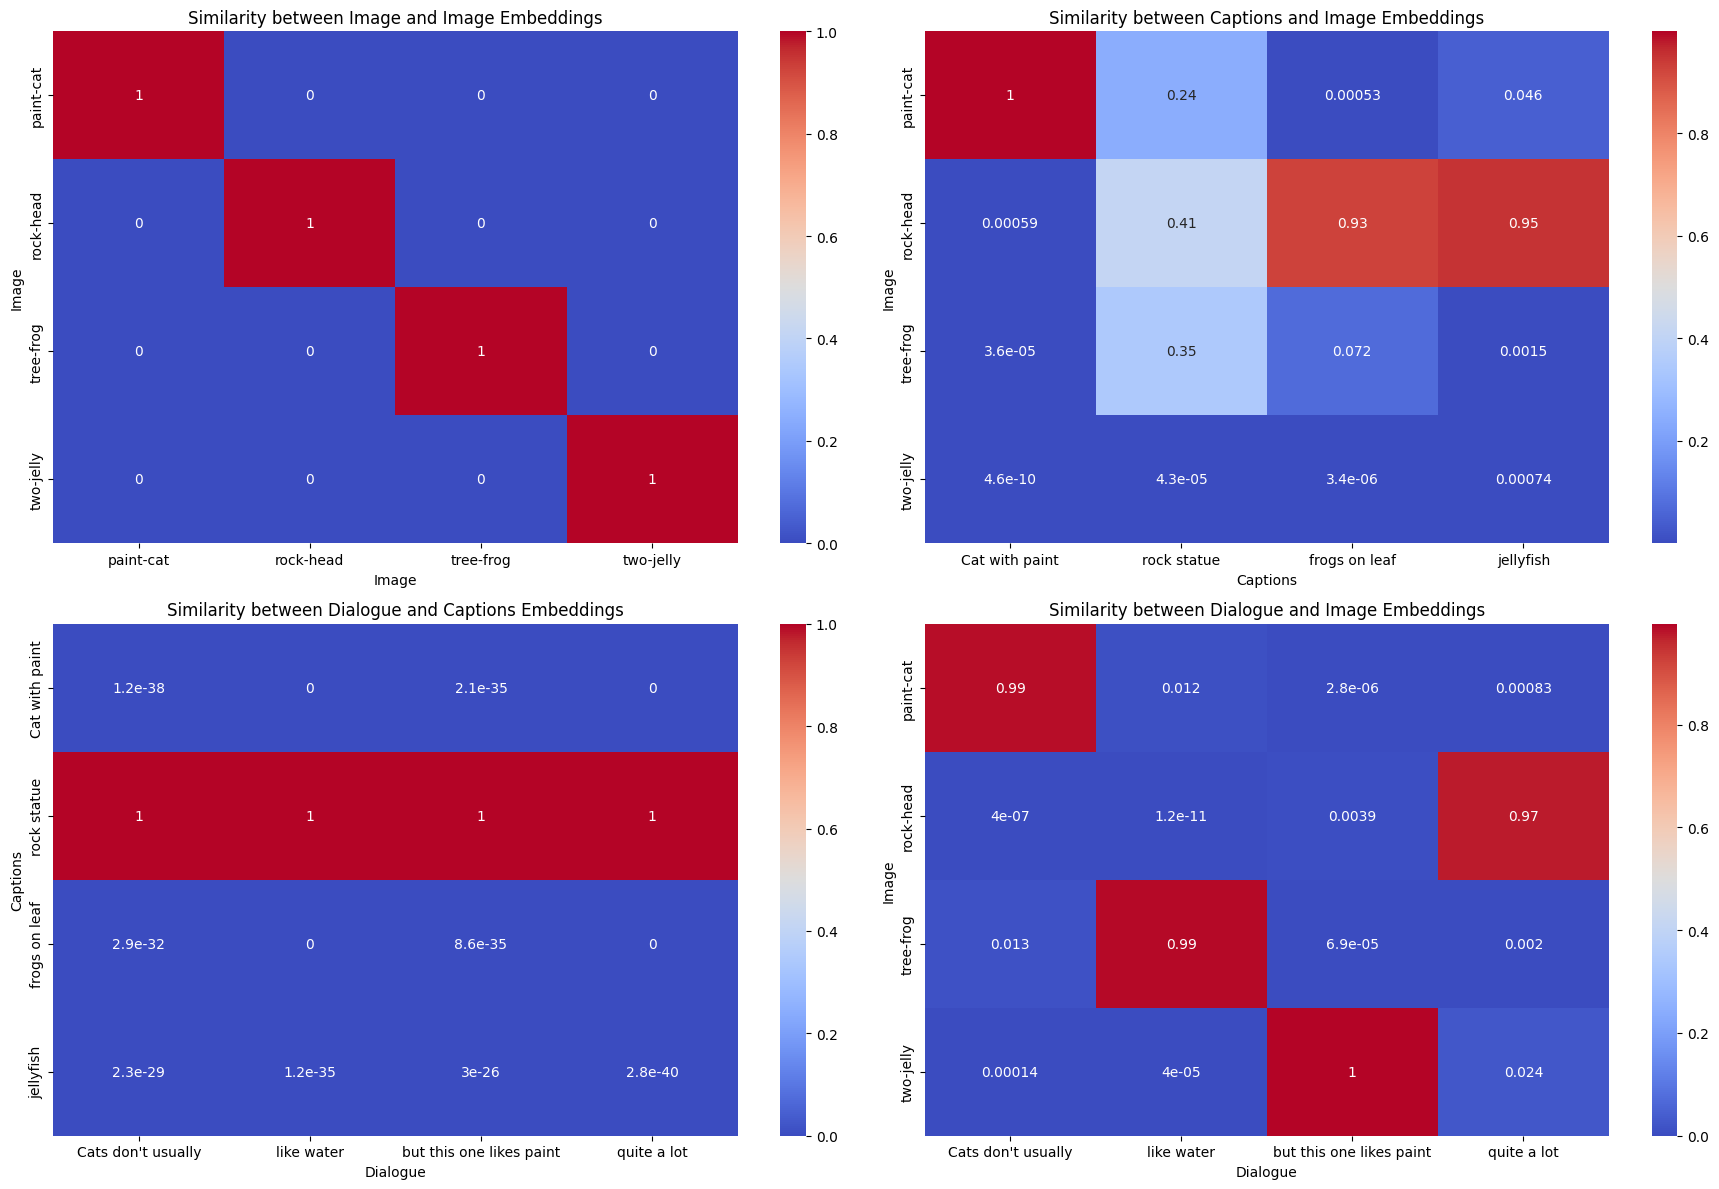

In [16]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity(similarity, xlab, ylab, xticks, yticks, ax):
    # Visualization of the similarity matrix on the provided axis
    sns.heatmap(similarity.numpy(), annot=True, cmap='coolwarm', xticklabels=xticks, yticklabels=yticks, ax=ax)
    ax.set_title(f"Similarity between {xlab} and {ylab} Embeddings")
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

## Expected Heatmap For Top Row: Diagonal Matrix. Plot [0][0] is a demo of this
sim_mtx = (image_avg_embeds @ image_avg_embeds.T).softmax(dim=0)
plot_similarity(sim_mtx, "Image", "Image", image_files, image_files, axs[0][0])

sim_mtx = (captions_avg_embeds @ image_avg_embeds.T).softmax(dim=0)
plot_similarity(sim_mtx, "Captions", "Image", text_captions, image_files, axs[0][1])

# sim_mtx = (audio_avg_embeds @ dialogue_avg_embeds.T).softmax(dim=0)
# plot_similarity(sim_mtx, "Audio", "Dialogue", text_dialogue, text_dialogue, axs[0][2])

## Expected Heatmap For Bottom Row: Undefined, but [1][2] doesn't look terrible...
sim_mtx = (dialogue_avg_embeds @ captions_avg_embeds.T).softmax(dim=0)
plot_similarity(sim_mtx, "Dialogue", "Captions", text_dialogue, text_captions, axs[1][0])

sim_mtx = (dialogue_avg_embeds @ image_avg_embeds.T).softmax(dim=0)
plot_similarity(sim_mtx, "Dialogue", "Image", text_dialogue, image_files, axs[1][1])

# sim_mtx = (audio_avg_embeds @ image_avg_embeds.T).softmax(dim=0)
# plot_similarity(sim_mtx, "Audio", "Image", text_dialogue, img_files, axs[1][2])

plt.tight_layout()
plt.show()

## OpenAI CLIP 

In [ ]:
from transformers import CLIPProcessor, CLIPModel

text_captions = ("Cat with paint", "rock statue", "frogs on leaf", "jellyfish")
text_dialogue = ("Cats don't usually", 'like water', 'but this one likes paint', 'quite a lot')

#######################################################################
## TODO: Load in a clip model of choice, reading over the model-card recommendations.
## HINT: We'd recommend openai/clip-vit-base-patch32
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

#######################################################################
## TODO: Compute the text and image embeddings for analysis
inputs_text = processor(text = text_captions + text_dialogue, return_tensors='pt', padding = True)
inputs_images = processor(images = images, return_tensors='pt', padding = True)

#######################################################################
## TODO: Get the text and image embeddings for final visual
with torch.no_grad():
    text_embeddings = model.get_text_features(**inputs_text)
    image_embeddings = model.get_image_features(**inputs_images)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sim_mtx = (text_embeddings[:4] @ image_embeddings.T).softmax(dim=0)
plot_similarity(sim_mtx, "Captions", "Image", text_captions, img_files, axs[0])

sim_mtx = (text_embeddings[4:] @ image_embeddings.T).softmax(dim=0)
plot_similarity(sim_mtx, "Dialogue", "Image", text_dialogue, img_files, axs[1])

plt.tight_layout()
plt.show()